In [149]:
import pandas_datareader.data as web 
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
import yfinance as yf

In [150]:
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
number_of_portfolios = 250
RF = 0

start_date = "2012-03-09"
end_date = "2023-03-13"

In [151]:
data = yf.download(stocks, start=start_date, end=end_date)
df = data['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [152]:
df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2012-03-09,16.571581,9.2160,14.950213,25.756952
2012-03-12,16.779188,9.1695,15.072255,25.797213
2012-03-13,17.268583,9.2295,15.386826,26.304457
2012-03-14,17.921513,9.1130,15.342244,26.384970
2012-03-15,17.799314,9.2215,15.470264,26.449389


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2012-03-09 to 2023-03-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2769 non-null   float64
 1   AMZN    2769 non-null   float64
 2   GOOG    2769 non-null   float64
 3   MSFT    2769 non-null   float64
dtypes: float64(4)
memory usage: 108.2 KB


In [154]:
portfolio_returns = []
portfolio_risk = []
portfolio_weights = []
portfolio_sharpe_ratios = []

In [155]:
for portfolio in range (number_of_portfolios):
    
    # geenrate random weights
    weights = np.random.random_sample(len(stocks))
    weights = np.round(weights/np.sum(weights), 2)
    portfolio_weights.append(weights)
    
    # calculate portfolio returns
    annualized_return = np.sum((df.pct_change().mean() * weights) * 252)
    portfolio_returns.append(annualized_return)

    # calculate portfolio risk
    matrix_covariance = df.pct_change().cov()
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights)) * 252
    portfolio_Standard_Deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_Standard_Deviation)
    
    # calculate portfolio sharpe ratio
    portfolio_sharpe_ratio = (annualized_return -RF) / portfolio_Standard_Deviation
    portfolio_sharpe_ratios.append(portfolio_sharpe_ratio)
    

In [156]:
print(portfolio_returns)

[0.2362309694514862, 0.24327125655721255, 0.2353123788298217, 0.23902514596381635, 0.23276030167750764, 0.24670173835670905, 0.23692523759609657, 0.24017681901418592, 0.23610126380948052, 0.23167673111859532, 0.24870299712836308, 0.23497075912190882, 0.24614554490124388, 0.22723697650372499, 0.23480097636537087, 0.23976157864908912, 0.2360494727134175, 0.22363472264123851, 0.2228679615709353, 0.23164303374475056, 0.23244705584286784, 0.24598579034488946, 0.2378806452034288, 0.2518178212251646, 0.24049182625882942, 0.23428500971834967, 0.24738954195510515, 0.23155152477077498, 0.23308101415036409, 0.24143124848689382, 0.2419707079853614, 0.23156316312364914, 0.23581723854552178, 0.2325660255409222, 0.2387697117293074, 0.22676124997929925, 0.2303318580888979, 0.2320171448924806, 0.2246894742742528, 0.2361918703745333, 0.2345906499611326, 0.24167046944568663, 0.2313146507916523, 0.2395703331815186, 0.24792940309835584, 0.23197865543961727, 0.23600444051180341, 0.24188871828103803, 0.24655

In [157]:
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
portfolio_sharpe_ratios = np.array(portfolio_sharpe_ratios) 
portfolio_metrics = [portfolio_returns, portfolio_risk, portfolio_sharpe_ratios, portfolio_weights]

In [158]:
port_df = pd.DataFrame(portfolio_metrics).T
port_df.columns = ['Returns', 'Risk', 'Sharpe Ratio', 'Weights']
port_df

,Returns,Risk,Sharpe Ratio,Weights
0,0.236231,0.239984,0.984362,"[0.25, 0.25, 0.26, 0.24]"
1,0.243271,0.246734,0.985967,"[0.22, 0.34, 0.19, 0.26]"
2,0.235312,0.24129,0.975227,"[0.42, 0.18, 0.25, 0.15]"
3,0.239025,0.238883,1.000593,"[0.2, 0.2, 0.11, 0.48]"
4,0.23276,0.250351,0.929736,"[0.14, 0.41, 0.36, 0.08]"
...,...,...,...,...
245,0.231823,0.244708,0.947346,"[0.15, 0.3, 0.39, 0.16]"
246,0.242708,0.246078,0.986303,"[0.12, 0.33, 0.14, 0.41]"
247,0.242103,0.256442,0.944085,"[0.06, 0.47, 0.22, 0.25]"
248,0.239472,0.248503,0.963657,"[0.44, 0.31, 0.21, 0.04]"


In [159]:
min_risk = port_df.iloc[port_df['Risk'].astype(float).idxmin()]   
min_risk

Returns                       0.226787
Risk                          0.234776
Sharpe Ratio                  0.965974
Weights         [0.2, 0.1, 0.36, 0.33]
Name: 177, dtype: object

In [160]:
high_return = port_df.iloc[port_df['Returns'].astype(float).idxmax()]   
high_return

Returns                        0.253657
Risk                           0.271852
Sharpe Ratio                    0.93307
Weights         [0.07, 0.62, 0.01, 0.3]
Name: 49, dtype: object

In [161]:
print('Min Risk')
print(min_risk)
print(stocks)
print('')


print('Highest Return')
print(high_return)
print(stocks)
print('')


Min Risk
Returns                       0.226787
Risk                          0.234776
Sharpe Ratio                  0.965974
Weights         [0.2, 0.1, 0.36, 0.33]
Name: 177, dtype: object
['AAPL', 'GOOG', 'MSFT', 'AMZN']

Highest Return
Returns                        0.253657
Risk                           0.271852
Sharpe Ratio                    0.93307
Weights         [0.07, 0.62, 0.01, 0.3]
Name: 49, dtype: object
['AAPL', 'GOOG', 'MSFT', 'AMZN']



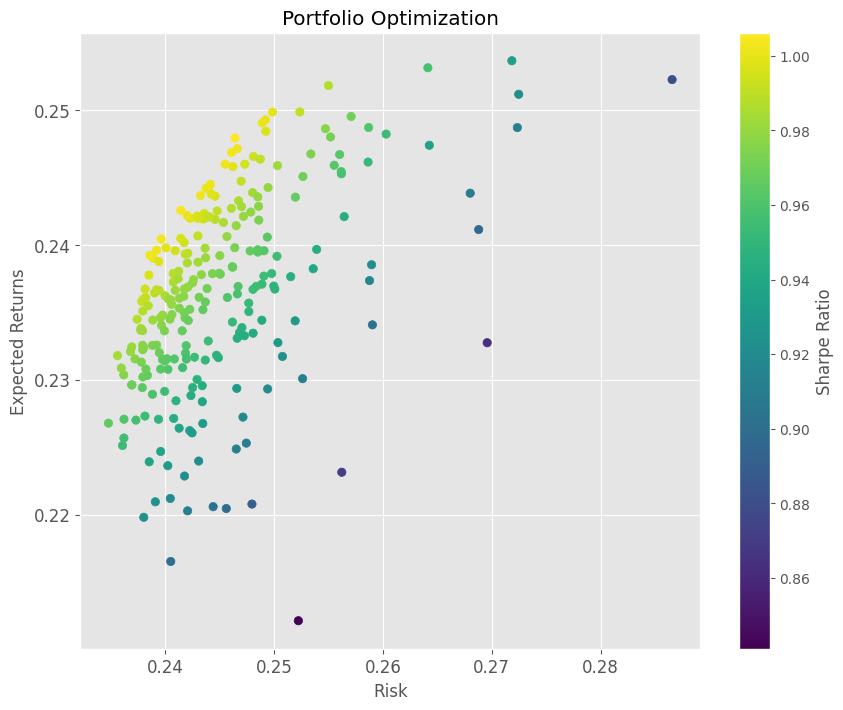

In [162]:
# visuzalization

plt.figure(figsize=(10, 8))
plt.scatter(port_df.Risk, port_df.Returns, c=portfolio_returns / portfolio_risk)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar(label='Sharpe Ratio')